<a href="https://colab.research.google.com/github/maria-snarava/portfolio-ml/blob/fixes/CustomerChurnPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Customer Churn Prediction

**Developed by Maryia Snarava**

This notebook demonstrates the process of predicting customer churn using machine learning techniques. **Customer churn** is when customers stop doing business with a company. Predicting churn can help businesses take proactive steps to retain customers. Throughout this notebook, we'll go through the entire machine learning pipeline, including data exploration, data preprocessing, feature engineering, model training, and evaluation.

 My approach is as follows:

1. I'll start with **Logistic Regression** as our baseline model. Logistic Regression is a simple yet powerful algorithm for binary classification problems like churn prediction. It's a great starting point as it's easy to implement and interpret.

2. Using **Logistic Regression**, I've achieved an accuracy of **79.29%** in predicting customer churn. This serves as our baseline performance.

3. Then, using **Feature Engineering**, I've improved this model.

4. Then I did **Hyperparameter Tuning** using  grid search and have improved this model.

3. Then I experimented with more advanced algorithms with hyperparameter tuning to improve upon this baseline:
   - Decision Tree
   - XGBoost
   - Support Vector Machines

4. Then I compared all model metrics and chosed the best one.
By comparing all models to our Logistic Regression baseline, I'll be able to assess get the beter performance.


For this notebook I used a dataset from Kaggle. You can find the dataset [here](https://www.kaggle.com/datasets/ankitverma2010/ecommerce-customer-churn-analysis-and-prediction).

## 1. Introduction


### What is Customer Churn?

Customer churn, also known as customer attrition, refers to the phenomenon where customers stop doing business with a company. In the context of this analysis:

- Churn occurs when a customer cancels their service or stops using a product.
- It's a critical metric for businesses, especially in subscription-based models.
- High churn rates can significantly impact a company's revenue and growth.

### Importance of Predicting Churn

Understanding and predicting churn is crucial for businesses because:

- It's more cost-effective to retain existing customers than to acquire new ones.
- Early identification of potential churners allows for targeted retention efforts.
- Reducing churn rate directly impacts the company's bottom line.
- It provides insights into product or service issues that may be causing customer dissatisfaction.

## 2. Data Loading and Exploration

Here, I'll get a better understanding of dataset. First, I load the customer dataset:

In [74]:
import numpy as np
import pandas as pd

In [75]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [76]:
RANDOM_STATE = 42

df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/data/ECommerceDataset.xlsx', sheet_name='E Comm')

### Data Variable Description
| Column Name | Description |
|----|----|
| **CustomerID** | Unique customer ID |
| **Churn** | Churn Flag |
| **Tenure** | Tenure of customer in organization  |
| **PreferredLoginDevice** | Preferred login device of customer |
| **CityTier** | City tier |
| **WarehouseToHome**| Distance in between warehouse to home of customer |
| **PreferredPaymentMode** | Preferred payment method of customer |
| **Gender** | Gender of customer |
| **HourSpendOnApp** | Number of hours spend on mobile application or website |
| **NumberOfDeviceRegistered** | Total number of deceives is registered on particular customer |
| **PreferedOrderCat** | Preferred order category of customer in last month |
| **SatisfactionScore** | Satisfactory score of customer on service |
| **MaritalStatus** | Marital status of customer |
| **NumberOfAddress** | Total number of added added on particular customer |
| **Complain** | Any complaint has been raised in last month |
| **OrderAmountHikeFromlastYear** | Percentage increases in order from last year |
| **CouponUsed** | Total number of coupon has been used in last month |
| **OrderCount** | Total number of orders has been places in last month |
| **DaySinceLastOrder** | Day Since last order by customer |
| **CashbackAmount** | Average cashback in last month |

In [77]:
df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


In [78]:
df.describe()

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,5630.000000,5630.000000,5366.000000,5630.000000,5379.000000,5375.000000,5630.000000,5630.000000,5630.000000,5630.000000,5365.000000,5374.000000,5372.000000,5323.000000,5630.000000
mean,52815.500000,0.168384,10.189899,1.654707,15.639896,2.931535,3.688988,3.066785,4.214032,0.284902,15.707922,1.751023,3.008004,4.543491,177.223030
std,1625.385339,0.374240,8.557241,0.915389,8.531475,0.721926,1.023999,1.380194,2.583586,0.451408,3.675485,1.894621,2.939680,3.654433,49.207036
min,50001.000000,0.000000,0.000000,1.000000,5.000000,0.000000,1.000000,1.000000,1.000000,0.000000,11.000000,0.000000,1.000000,0.000000,0.000000
25%,51408.250000,0.000000,2.000000,1.000000,9.000000,2.000000,3.000000,2.000000,2.000000,0.000000,13.000000,1.000000,1.000000,2.000000,145.770000
50%,52815.500000,0.000000,9.000000,1.000000,14.000000,3.000000,4.000000,3.000000,3.000000,0.000000,15.000000,1.000000,2.000000,3.000000,163.280000
75%,54222.750000,0.000000,16.000000,3.000000,20.000000,3.000000,4.000000,4.000000,6.000000,1.000000,18.000000,2.000000,3.000000,7.000000,196.392500
max,55630.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,26.000000,16.000000,16.000000,46.000000,324.990000


We can see that data range is big, so we need scale data.

Checking for duplicates in CustomerID column:

In [79]:
df['CustomerID'].duplicated().any()

False

There are no duplicates and we could drop CustomerID column, this value doesn't necessary for analysis

In [80]:
df = df.drop('CustomerID', axis=1)

## **3. Data Preprocessing**

### Handling Missing Values

First, we need to identify where missing values occur in our dataset - show percent of missing values:

In [81]:
#Identifying Missing Values
round((df.isnull().sum()*100 / df.shape[0]),2)

,0
Churn,0.00
Tenure,4.69
PreferredLoginDevice,0.00
CityTier,0.00
WarehouseToHome,4.46
PreferredPaymentMode,0.00
Gender,0.00
HourSpendOnApp,4.53
NumberOfDeviceRegistered,0.00
PreferedOrderCat,0.00


All Missing values less than 6% so we can use Median **Imputation** from SimpleImputer.

I will use **StandardScaler** for **Scaling the data**

In [82]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

def prepare_data(df):
    df_X = df.drop(columns=["Churn"])
    num_columns = df_X.select_dtypes(["int64", "float64"]).columns
    pipline_num = Pipeline(steps=[('imputer', SimpleImputer(strategy="median")), ('scaler', StandardScaler())])

    return df_X, num_columns, pipline_num

df_X, num_columns, pipline_num = prepare_data(df)

Transform categorical data to numerical using **OneHotEncoder**.






In [83]:
cat_columns = df.select_dtypes("object").columns
pipline_cat = Pipeline(steps=[('encoding', OneHotEncoder())])

transformer = ColumnTransformer(
    transformers=[('categorical_col', pipline_cat, cat_columns),
                  ('numerical_col', pipline_num, num_columns)]
    )

  ### Checking imbalance  
  It is possible than there are small number of customers is crunched, so our data could be imbalalanced. Let's check it.

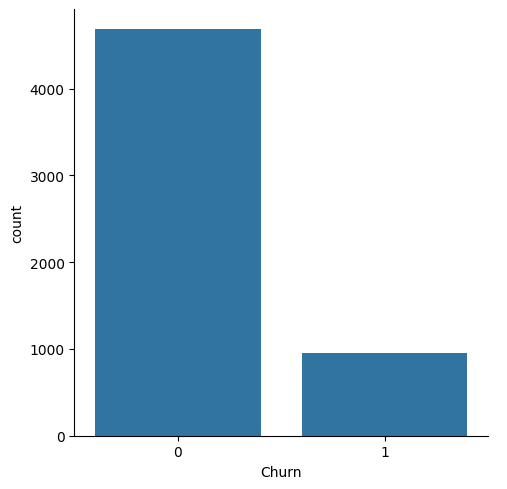

In [84]:
import seaborn as sns

sns.catplot(x='Churn', kind='count', data=df)

Data imbalanced so let's implement cost-sensitive learning during creating model.

## **4. Logistic Regression Model Building**
I am going to use **20% for cross-validation** to evaluate the model's performance and tune hyperparameters during training. It helps me find the best model configuration before final evaluation. And I use **10% as test set** - completely separate portion of data used for the final and unbiased evaluation of your model's performance. The model has never seen this data during training or hyperparameter tuning.

Spliting data **using train_test_split** from **sklearn.model_selection**:

In [85]:
from sklearn.model_selection import train_test_split
from imblearn.pipeline import Pipeline
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

# prepare X and y
Y = df["Churn"]
X = df.drop(columns=["Churn"])
TEST_SIZE = 0.2
CV_SIZE = 0.3

# prpeare training, cross-validation and testing data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=TEST_SIZE, random_state=RANDOM_STATE)
X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, test_size=CV_SIZE, random_state=RANDOM_STATE)

### Implementing logistic regression

Data imbalanced so let's implement cost-sensitive learning, using **compute_class_weight** function from scikit-learn:

In [86]:
from sklearn.utils.class_weight import compute_class_weight
from sklearn.linear_model import LogisticRegression

class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weight = {0: class_weights[0], 1: class_weights[1]}
lg_model = LogisticRegression(max_iter=10_000, random_state=RANDOM_STATE, class_weight=class_weight)

pipeline = Pipeline([
          ('transformer', transformer),
          ('classifier', lg_model)
      ])

### Model training

In [87]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('categorical_col',
                                                  Pipeline(steps=[('encoding',
                                                                   OneHotEncoder())]),
                                                  Index(['PreferredLoginDevice', 'PreferredPaymentMode', 'Gender',
       'PreferedOrderCat', 'MaritalStatus'],
      dtype='object')),
                                                 ('numerical_col',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['Tenure', 'CityTier', 'WarehouseToHome', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'SatisfactionScore', 'NumberOfAddress',
       'Complain', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount'],
      dtype='object'))])),
                ('classifier',
                 LogisticRegression(class_weight={0: 0.6068540623796689,
                                                  1: 2.8396396396396395},
                                    max_iter=10000, random_state=42))])

## **5. Logistic Regression Model Evaluation**

To evaluate model I will use next metrics:
-  **Accurany** - calculate predictions on cross-validation data

-  Calculating **precision, recall, and F1-score** - we need this metrics, because our data set is imbalansed

-  Plotting **ROC curve**: The Receiver Operating Characteristic (ROC) curve and the **Area Under the Curve** (AUC) are important tools for evaluating the performance of a binary classification model.
- **The ROC curve** is a graph showing the performance of a classification model at all classification thresholds. It plots two parameters:
     1. True Positive Rate (TPR) or Recall: TP / (TP + FN)
     2. False Positive Rate (FPR): FP / (FP + TN)

**Overfitting detection** - we could compare model accurancy on train and cross-validation data to detect overfitting



Accuracy on test set: 81.879%
Accuracy on train set: 80.584%
______________________________________________
              precision    recall  f1-score   support

           0       0.96      0.82      0.88      1144
           1       0.45      0.81      0.58       208

    accuracy                           0.82      1352
   macro avg       0.70      0.81      0.73      1352
weighted avg       0.88      0.82      0.84      1352



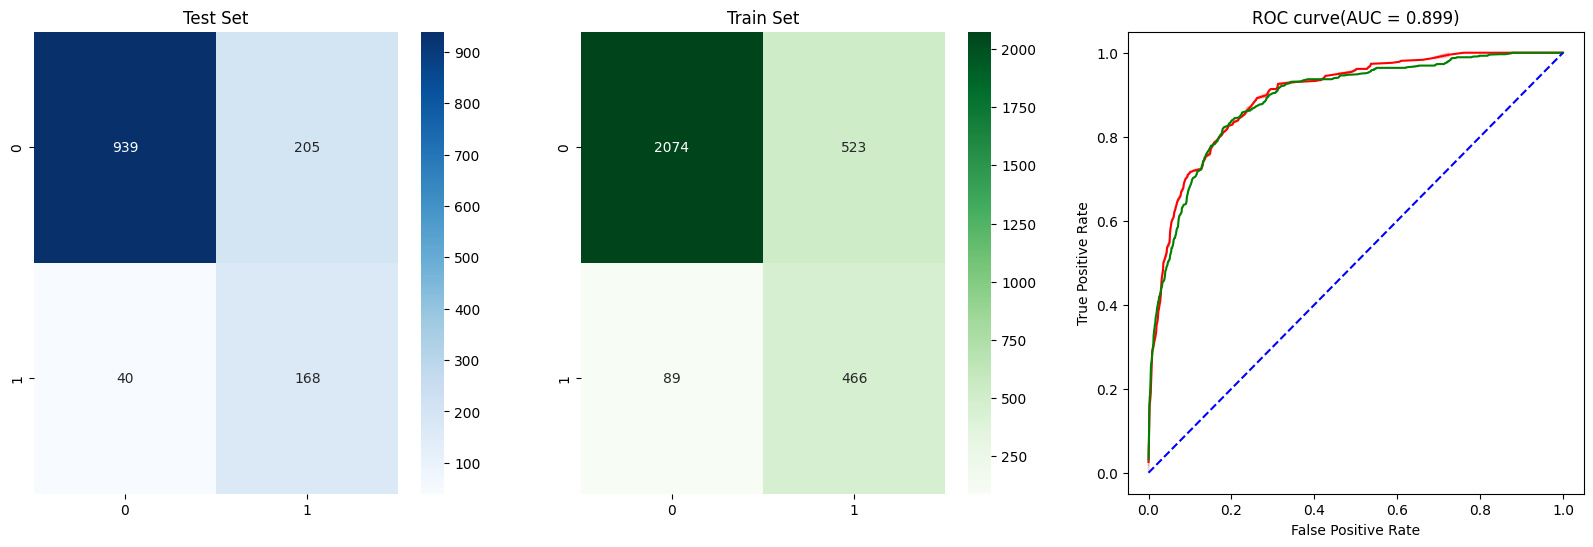

In [88]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn.objects as so

collect_results = pd.DataFrame({
    'Accuracy Score':[],
    'F1-score': [],
    'Precision': [],
    'AUC': [],
    'Model':[]
    })
def model_evaluation(pipeline, X_test, y_test, X_train, y_train, probability=True):
    # calculate accuracy
    y_train_pred = pipeline.predict(X_train)
    y_test_pred = pipeline.predict(X_test)
    accuracy_score = pipeline.score(X_test, y_test)
    print(f"Accuracy on test set: {accuracy_score * 100:0.5}%")
    print(f"Accuracy on train set: {pipeline.score(X_train, y_train)* 100:0.5}%")
    #confusion matrixes
    fig, ax =plt.subplots(1, 3, figsize=(20, 6))

    cm_lr_test = confusion_matrix(y_test, y_test_pred)
    ax[0].set_title('Test Set')
    sns.heatmap(cm_lr_test, annot = True,fmt = 'd', cmap ='Blues', ax=ax[0])

    cm_lr = confusion_matrix(y_train, y_train_pred)
    ax[1].set_title('Train Set')
    sns.heatmap(cm_lr,annot = True,fmt = 'd', cmap ='Greens', ax=ax[1])
    if probability:
        y_train_pred_proba = pipeline.predict_proba(X_train)[:, 1]
        y_test_pred_proba = pipeline.predict_proba(X_test)[:, 1]
    else:
        y_train_pred_proba = pipeline.predict(X_train)
        y_test_pred_proba = pipeline.predict(X_test)

    train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred_proba)
    test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred_proba)

    # Calculate the AUC
    auc_value = auc(test_fpr, test_tpr)
    ax[2].set_title(f'ROC curve(AUC = {auc_value:.3f})')
    # Plot the ROC curve

    sns.lineplot(x=test_fpr, y=test_tpr, color = 'blue', ax=ax[2])
    sns.lineplot(x=train_fpr, y=train_tpr, color = 'green', ax=ax[2])
    sns.lineplot(x=[0,1], y=[0,1], color= 'blue',linestyle = 'dashed', ax=ax[2])

    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

    fig.show()

    print('______________________________________________')
    report = classification_report(y_test, y_test_pred,output_dict=True)
    print(classification_report(y_test, y_test_pred))
    f1 = report['1']['f1-score']
    precision = report['1']['precision']

    return {
    'Accuracy Score': accuracy_score,
    'F1-score': f1,
    'Precision': precision,
    'AUC': auc_value
    }

results = model_evaluation(pipeline, X_cv, y_cv,  X_train, y_train)
results['Model'] = 'Logistic Regression'

collect_results = pd.concat([collect_results, pd.DataFrame(results, index=[0])])

So we have on cross-validation set:
- Accuracy 81.879%  
- AUC is 0.899,
- f1-score for true value is 0.58

This serves as our baseline performance.


## Feature Engineering - Adding new variables

Let's create new features to increese accurancy of logistic regression:

- **Cashback per order** - let's caclulate the average amount of cashback for order
- **Average hour spend on app per order** - how many hours user spend on every order?
- **Satisfaction score after complain** - let's use satisfaction score for users who complain
- **Cashback amount per month** - average size of cashback every month
- And let's add polynomial features with the most correlated features

In [89]:
def add_features_to_set(df):
    df_new_features = df.copy()
    df_new_features['cashback_per_order'] = df['CashbackAmount'] / df['OrderCount']
    df_new_features['avg_hour_spend_on_app_per_order'] = df['HourSpendOnApp'] / df['OrderCount']
    df_new_features['satisfaction_score_after_complain'] = df['Complain'] * df['SatisfactionScore']
    df_new_features['cashback_amount_per_month'] = df['CashbackAmount']/ (df['Tenure'] + 1)
    df_new_features['satisfaction_score_2'] = df['SatisfactionScore'] * df['Complain']
    df_new_features['tenure_2'] =  df['Tenure'] * df['Tenure']
    df_new_features['tenure_3'] =  df['Tenure'] * df['Tenure'] * df['Tenure']
    df_new_features['DaySinceLastOrder_2'] = df['DaySinceLastOrder'] * df['DaySinceLastOrder']
    df_new_features['cashback_amount_per_month_2'] = df_new_features['cashback_amount_per_month'] * df_new_features['cashback_amount_per_month']

    return df_new_features

X_train_2 = add_features_to_set(X_train)
X_cv_2 = add_features_to_set(X_cv)
X_test_2 = add_features_to_set(X_test)

In [90]:
len(X_train_2.columns)

27

## **6. Logistic Regression with Feature Engineering Model Building and Evaluation**

Accuracy on test set: 84.541%
Accuracy on train set: 83.534%
______________________________________________
              precision    recall  f1-score   support

           0       0.96      0.85      0.90      1144
           1       0.50      0.81      0.62       208

    accuracy                           0.85      1352
   macro avg       0.73      0.83      0.76      1352
weighted avg       0.89      0.85      0.86      1352



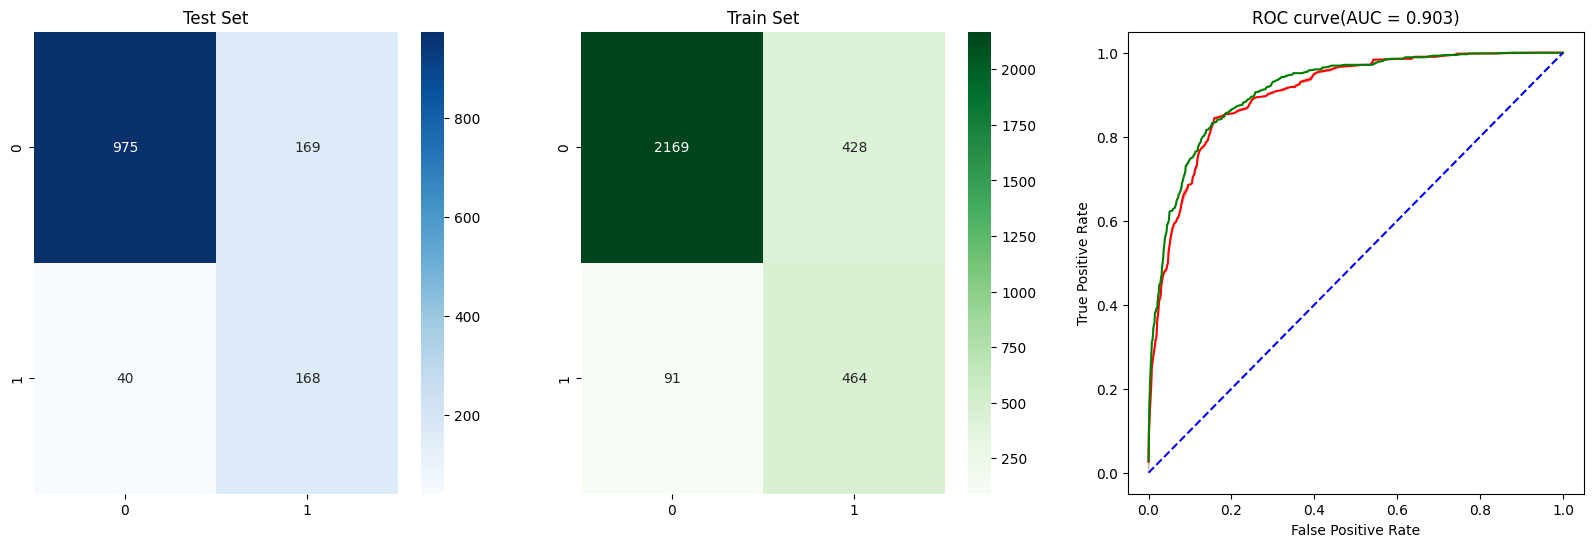

In [91]:
def prepare_pipeline(X, model):
    num_columns = X.select_dtypes(["int64", "float64"]).columns
    pipline_num = Pipeline(steps=[('imputer', SimpleImputer(strategy="median")), ('scaler', StandardScaler())])

    cat_columns = X.select_dtypes("object").columns
    pipline_cat = Pipeline(steps=[('encoding', OneHotEncoder())])

    transformer = ColumnTransformer(
        transformers=[('categorical_col', pipline_cat, cat_columns),
                      ('numerical_col', pipline_num, num_columns)]
        )

    pipeline = Pipeline([
              ('transformer', transformer),
              ('classifier', model)
          ])

    return pipeline

pipeline_2 = prepare_pipeline(X_train_2, lg_model)
pipeline_2.fit(X_train_2, y_train)

results = model_evaluation(pipeline_2, X_cv_2, y_cv,  X_train_2, y_train)
results['Model'] = 'Logistic Regression With New Features'

collect_results = pd.concat([collect_results, pd.DataFrame(results, index=[1])])

Using feature engineering I achived on cross-validation set:

- Accuracy 84.541%  
- AUC is 0.903,
- f1-score for true value is 0.62
- precision for True value is 0.50

# **7. Hyperparameter Tuning**
Let's find better huperparams using **GridSearchCV**. I will try different solvers and the C parameters, that controls the penality strength.Our data is imbalansed, so I am going to compare model's **roc_auc** parameter.

In [92]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold

solvers = ['newton-cg', 'lbfgs', 'liblinear']
c_values = np.logspace(-2,2,5)

# define grid search
grid = dict(
    classifier__solver=solvers,
    classifier__C=c_values,
    classifier__class_weight=[class_weight],
    classifier__max_iter=[10_000],
    classifier__random_state=[RANDOM_STATE]
    )
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=RANDOM_STATE)
grid_search = GridSearchCV(estimator=pipeline_2, param_grid=grid, cv=cv, scoring='roc_auc')
grid_result = grid_search.fit(X_train_2, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.904342 using {'classifier__C': 10.0, 'classifier__class_weight': {0: 0.6068540623796689, 1: 2.8396396396396395}, 'classifier__max_iter': 10000, 'classifier__random_state': 42, 'classifier__solver': 'liblinear'}
0.889139 (0.026285) with: {'classifier__C': 0.01, 'classifier__class_weight': {0: 0.6068540623796689, 1: 2.8396396396396395}, 'classifier__max_iter': 10000, 'classifier__random_state': 42, 'classifier__solver': 'newton-cg'}
0.889139 (0.026286) with: {'classifier__C': 0.01, 'classifier__class_weight': {0: 0.6068540623796689, 1: 2.8396396396396395}, 'classifier__max_iter': 10000, 'classifier__random_state': 42, 'classifier__solver': 'lbfgs'}
0.889530 (0.025972) with: {'classifier__C': 0.01, 'classifier__class_weight': {0: 0.6068540623796689, 1: 2.8396396396396395}, 'classifier__max_iter': 10000, 'classifier__random_state': 42, 'classifier__solver': 'liblinear'}
0.897503 (0.023339) with: {'classifier__C': 0.1, 'classifier__class_weight': {0: 0.6068540623796689, 1: 2.8396396

So, let's create model using the best params:

Accuracy on test set: 85.207%
Accuracy on train set: 83.725%
______________________________________________
              precision    recall  f1-score   support

           0       0.96      0.86      0.91      1144
           1       0.51      0.82      0.63       208

    accuracy                           0.85      1352
   macro avg       0.74      0.84      0.77      1352
weighted avg       0.89      0.85      0.86      1352



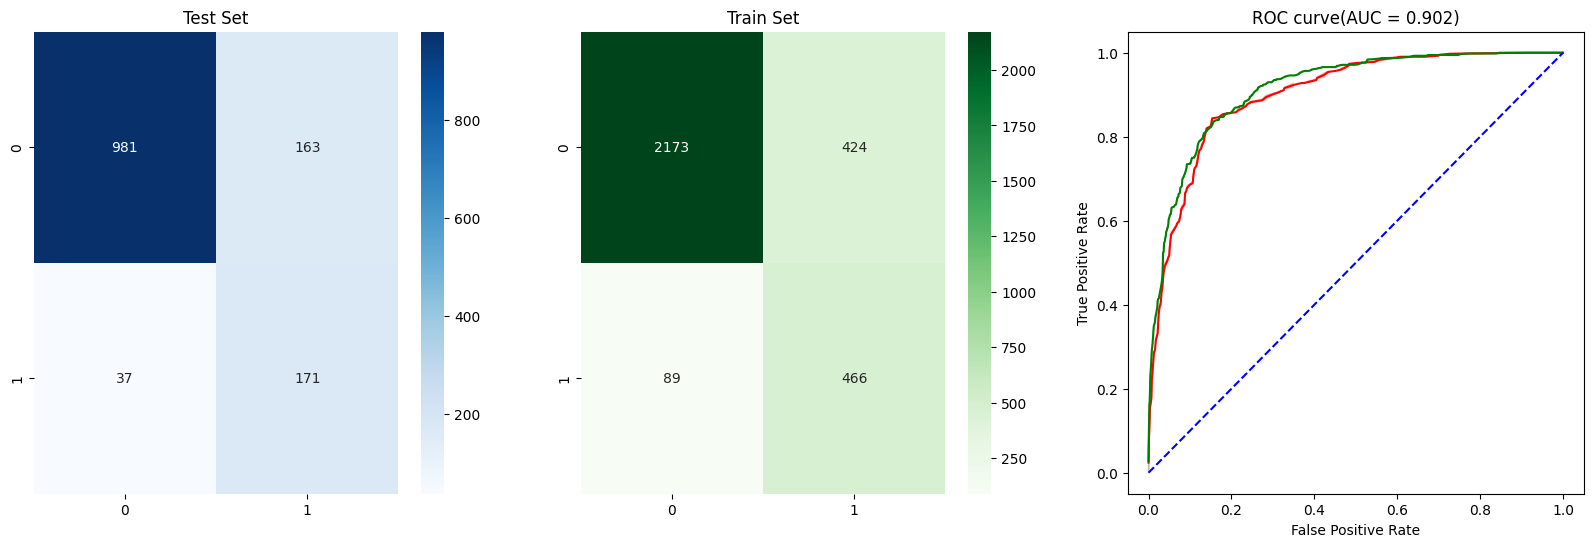

In [93]:
lg_model_2 = LogisticRegression(
    max_iter=10_000, random_state=RANDOM_STATE,
    C=grid_result.best_params_["classifier__C"],
    solver=grid_result.best_params_["classifier__solver"],
    class_weight=class_weight
    )

pipeline_3 = prepare_pipeline(X_train_2, lg_model_2)

pipeline_3.fit(X_train_2,y_train)

results = model_evaluation(pipeline_3, X_cv_2, y_cv, X_train_2, y_train)
results['Model'] = 'Logistic Regression Hyperparameter Tuning'

collect_results = pd.concat([collect_results, pd.DataFrame(results, index=[2])])

Using Hyperparameter Tuning I achived on cross-validation set:

- Accuracy 85.207%  
- AUC is 0.902,
- f1-score for true value is 0.63
- precision for True value is 0.51

### Interpretation

An accuracy of 85.2% indicates that our model correctly predicts whether a customer will churn or not in 85.2% of cases. While this is a solid performance, there's still room for improvement.It's important to note that accuracy alone may not be sufficient to fully evaluate the model, especially if the dataset is imbalanced. Wwe can see, that precision for true value is only 0.51. It meens, that we can trutly predict only 51% of customer who are going to churn.

### Limitations

1. Logistic regression assumes a linear relationship between the features and the log-odds of the outcome, which may not always hold true in complex real-world scenarios.
2. It may not capture complex, non-linear relationships in the data.
3. The model's performance might be affected if there are strong correlations between independent variables.

I think that is all that we can get from logistic regression, so let's try advanced algorithms, that could potentially yield better results for this classification task.

# **6. Decision Tree Classifier with Hyperparameters Tuning**

In [94]:
from sklearn.tree import DecisionTreeClassifier

decision_tree_model = DecisionTreeClassifier(
    random_state=RANDOM_STATE,
    class_weight=class_weight
    )

pipeline_4 = prepare_pipeline(X_train_2, decision_tree_model)

min_samples_split_list = [2,10, 30, 50, 100, 200, 300, 700] ## If the number is an integer, then it is the actual quantity of samples,
max_depth_list = [1,2, 3, 4, 6, 8, 16, 32, 64, None] # None means that there is no depth limit.

# define grid search
grid_dt = dict(
    classifier__min_samples_split=min_samples_split_list,
    classifier__max_depth=max_depth_list,
    classifier__class_weight=[class_weight],
    classifier__random_state=[RANDOM_STATE]
    )

grid_search_dt = GridSearchCV(estimator=pipeline_4, param_grid=grid_dt, cv=cv, scoring='f1')
grid_result_dt = grid_search_dt.fit(X_train_2, y_train)
# summarize results
print("Best: %f using %s" % (grid_result_dt.best_score_, grid_result_dt.best_params_))

Best: 0.775925 using {'classifier__class_weight': {0: 0.6068540623796689, 1: 2.8396396396396395}, 'classifier__max_depth': 32, 'classifier__min_samples_split': 2, 'classifier__random_state': 42}


Accuracy on test set: 93.935%
Accuracy on train set: 100.0%
______________________________________________
              precision    recall  f1-score   support

           0       0.97      0.96      0.96      1144
           1       0.79      0.83      0.81       208

    accuracy                           0.94      1352
   macro avg       0.88      0.89      0.89      1352
weighted avg       0.94      0.94      0.94      1352



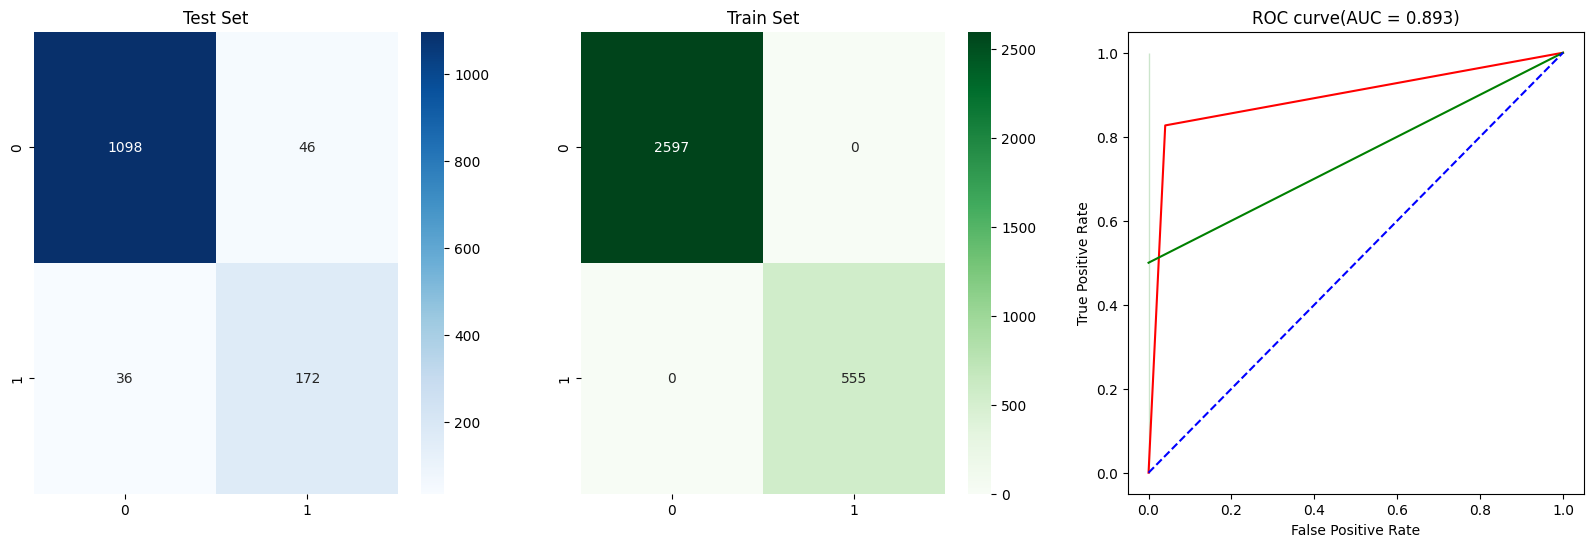

In [95]:
decision_tree_model_2 = DecisionTreeClassifier(
    random_state=RANDOM_STATE,
    class_weight=class_weight,
    max_depth = grid_result_dt.best_params_["classifier__max_depth"],
    min_samples_split = grid_result_dt.best_params_["classifier__min_samples_split"]
    )

pipeline_5 = prepare_pipeline(X_train_2, decision_tree_model_2)

pipeline_5.fit(X_train_2,y_train)

results = model_evaluation(pipeline_5, X_cv_2, y_cv, X_train_2, y_train)
results['Model'] = 'Decision Tree'

collect_results = pd.concat([collect_results, pd.DataFrame(results, index=[3])])

For decision tree we have:

- Accuracy 93.935%  
- AUC is 0.893,
- f1-score for true value is 0.81
- precision for True value is 0.79

Let's try more compex algorithm, based on desion trees to impove results.

## 7. **XGBoost with Hyperparameters Tuning**

In [96]:
from xgboost import XGBClassifier

xgb = XGBClassifier(
    random_state=RANDOM_STATE
    )

pipeline_5 = prepare_pipeline(X_train_2, xgb)

grid_xgb = dict(
    classifier__n_estimators=np.arange(10,100,10),
    classifier__learning_rate=[0.001,0.005,0.01,0.05,0.1,0.5,1,5]
    )

grid_search_xgb = GridSearchCV(estimator=pipeline_5, param_grid=grid_xgb, cv=cv, scoring='f1')
grid_result_xgb = grid_search_xgb.fit(X_train_2, y_train)
# summarize results
print("Best: %f using %s" % (grid_result_xgb.best_score_, grid_result_xgb.best_params_))

Best: 0.855665 using {'classifier__learning_rate': 0.5, 'classifier__n_estimators': 60}


Accuracy on test set: 96.08%
Accuracy on train set: 100.0%
______________________________________________
              precision    recall  f1-score   support

           0       0.97      0.98      0.98      1144
           1       0.89      0.85      0.87       208

    accuracy                           0.96      1352
   macro avg       0.93      0.92      0.92      1352
weighted avg       0.96      0.96      0.96      1352



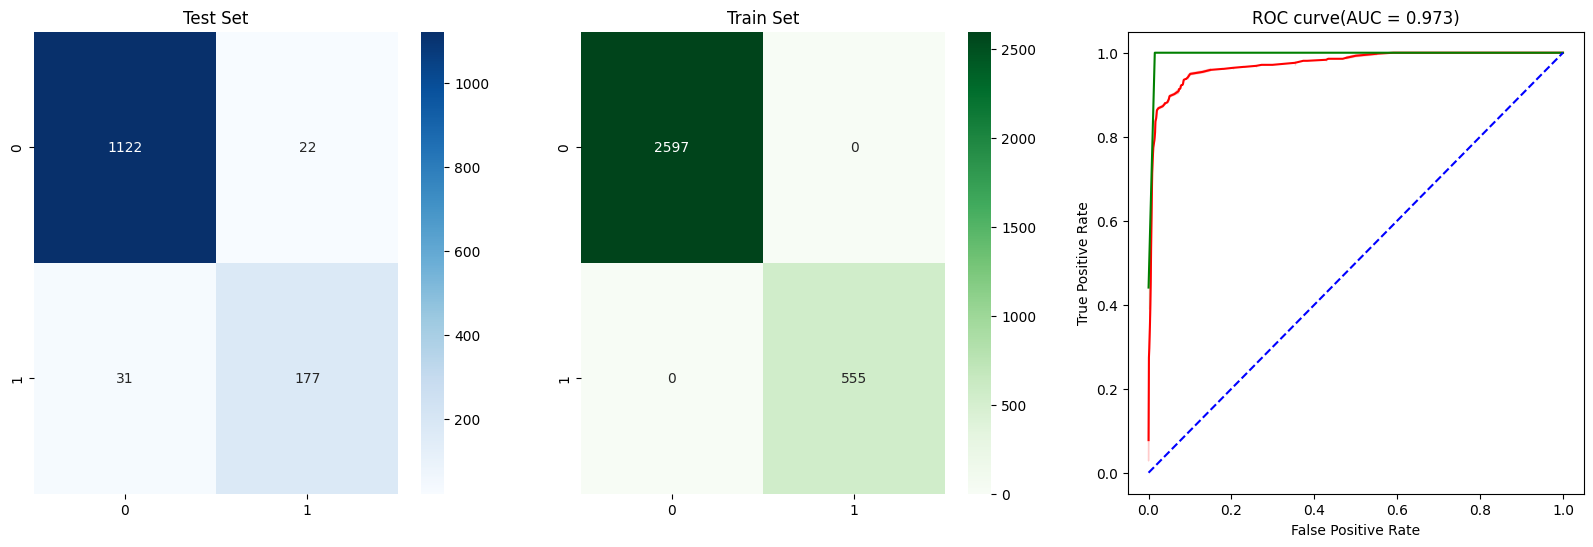

In [97]:
xgb_2 = XGBClassifier(
    random_state=RANDOM_STATE,
    learning_rate = grid_result_xgb.best_params_["classifier__learning_rate"],
    n_estimators = grid_result_xgb.best_params_["classifier__n_estimators"]
    )

pipeline_6 = prepare_pipeline(X_train_2, xgb_2)

pipeline_6.fit(X_train_2,y_train)
results = model_evaluation(pipeline_6, X_cv_2, y_cv, X_train_2, y_train)
results['Model'] = 'XGBClassifier'

collect_results = pd.concat([collect_results, pd.DataFrame(results, index=[4])])

For XGBClassifier we have:

- Accuracy 96.08%
- AUC is 0.973,
- f1-score for true value is 0.87
- precision for True value is 0.89

Is is good result, let's see if we could improve it using other algithms.

# **8. Support Vector Machines with Hyperparameters Tuning**

In [98]:
from sklearn.svm import SVC

grid_svc = {
    "classifier__C":np.arange(1,7,1),
    'classifier__gamma':[0.01,0.05,0.1,0.5,1,5]
    }
svm = SVC(random_state=RANDOM_STATE)
pipeline_7 = prepare_pipeline(X_train_2, svm)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=RANDOM_STATE)
grid_search_svm = GridSearchCV(estimator=pipeline_7, param_grid=grid_svc, cv=cv, scoring='f1')
grid_result_svm = grid_search_svm.fit(X_train_2, y_train)
# summarize results
print("Best: %f using %s" % (grid_result_svm.best_score_, grid_result_svm.best_params_))

Best: 0.845287 using {'classifier__C': 6, 'classifier__gamma': 0.1}


Accuracy on test set: 95.34%
Accuracy on train set: 99.905%
______________________________________________
              precision    recall  f1-score   support

           0       0.97      0.98      0.97      1144
           1       0.87      0.82      0.84       208

    accuracy                           0.95      1352
   macro avg       0.92      0.90      0.91      1352
weighted avg       0.95      0.95      0.95      1352



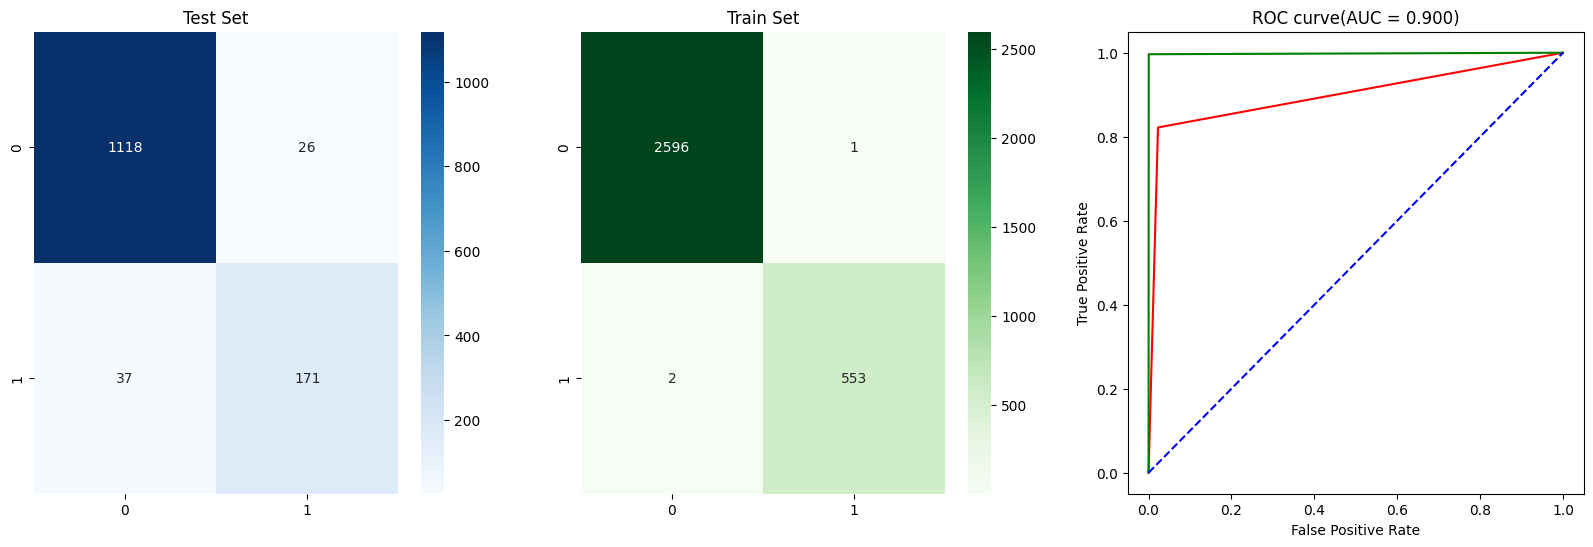

In [99]:
svm_2 = SVC(
    random_state=RANDOM_STATE,
    C = grid_result_svm.best_params_["classifier__C"],
    gamma = grid_result_svm.best_params_["classifier__gamma"]
    )

pipeline_8 = prepare_pipeline(X_train_2, svm_2)

pipeline_8.fit(X_train_2,y_train)

results = model_evaluation(pipeline_8, X_cv_2, y_cv, X_train_2, y_train, probability=False)
results['Model'] = 'Support Vector Machines'

collect_results = pd.concat([collect_results, pd.DataFrame(results, index=[5])])

For upport Vector Machines we have:

- Accuracy 95.34%
- AUC is 0.973,
- f1-score for true value is 0.84
- precision for True value is 0.87

Is is good result, but XGBClassifier got better results.

# **9. Comparison of models**

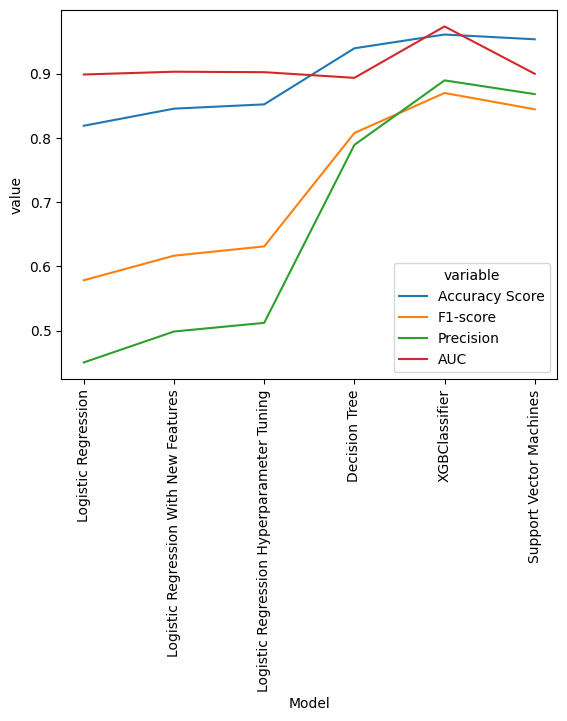

In [100]:
collect_results_melted = pd.melt(collect_results, id_vars=['Model'], value_vars=['Accuracy Score', 'F1-score', 'Precision', 'AUC'])
sns.lineplot(x='Model', y='value', hue='variable', data=collect_results_melted)
plt.xticks(rotation=90)
plt.show()

As we could see on the plot we got the best results on all metrics with XGBClassifier. Let's choose it as a best model and evaluate it on test set:

Accuracy on test set: 95.737%
Accuracy on train set: 100.0%
______________________________________________
              precision    recall  f1-score   support

           0       0.97      0.98      0.97       941
           1       0.91      0.83      0.86       185

    accuracy                           0.96      1126
   macro avg       0.94      0.91      0.92      1126
weighted avg       0.96      0.96      0.96      1126



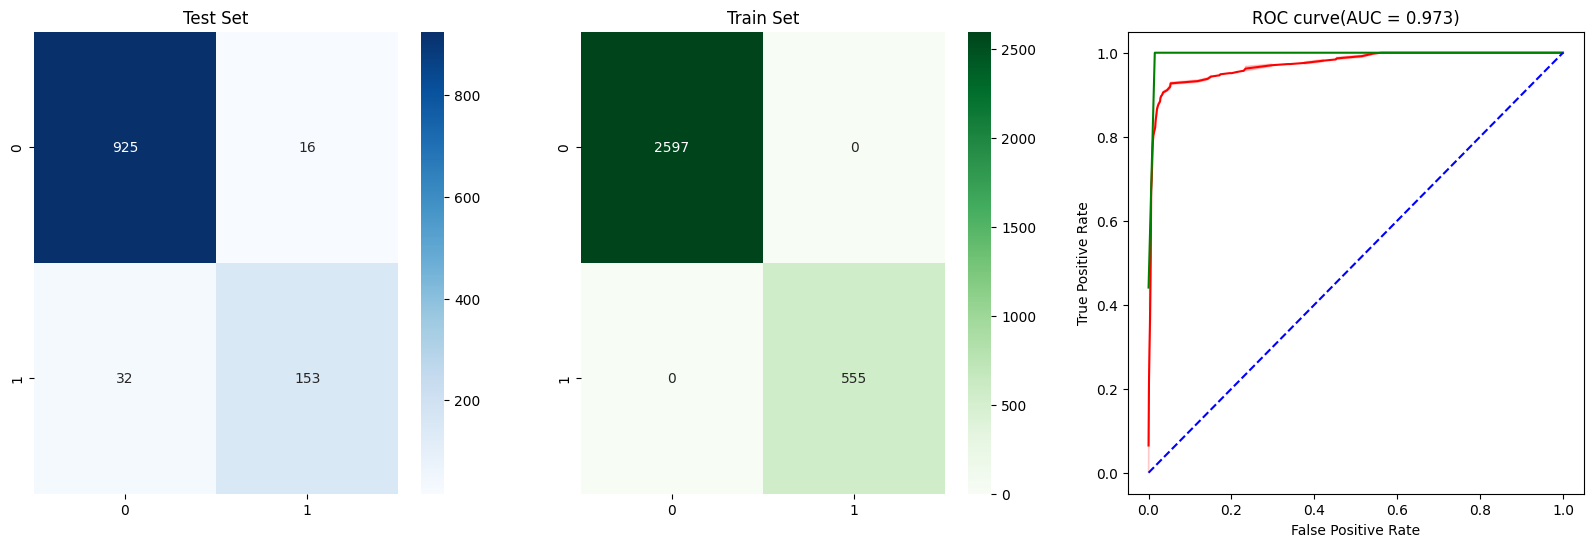

In [102]:
result = model_evaluation(pipeline_6, X_test_2, y_test, X_train_2, y_train)

As results we have on test set:

- Accuracy 95.737%
- AUC is 0.973,
- f1-score for true value is 0.86
- precision for True value is 0.91



# **9.Summary of Results**
In this project, I built a customer churn prediction model using several machine learning models. The best model was **XGBClassifier** with **accuracy 95.737%** and **precision for True value 0.91** on the test set.

## Next Steps
To improve the model and gain deeper insights, I could suggest the following steps:

- **Feature Importance Analysis**: Conduct a deeper analysis of feature importances to understand key drivers of churn.
- **Regular Model Updates**: Plan for periodic retraining of the model with new data to maintain its predictive power over time.
- **Deploy the model**: Create a REST API using Flask or FastAPI and deploy it to cloud providers.
- **Model Monitoring**: Track the model's performance over time to ensure it remains accurate and effective.
- **Explainability**: Consider using techniques like SHAP (SHapley Additive exPlanations) to understand how the model makes predictions and build trust in its outputs.

In [103]:
%%writefile requirements.txt
pandas==1.5.3
numpy==1.23.5
scikit-learn==1.2.2
imblearn==0.10.1
seaborn==0.12.2
matplotlib==3.7.1
xgboost==1.7.5

Writing requirements.txt
